In [1]:
from Bio import SeqIO
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from math import ceil

In [2]:
qual_buckets = defaultdict(list)
with open("../data/E_4_20_1_short_example.fq") as input_handle:
    for read in SeqIO.parse(input_handle, "fastq"):
        qual = read._per_letter_annotations["phred_quality"]
        qual_buckets[len(qual)].append(qual)


In [3]:
qual_array = []
for key in sorted(qual_buckets.keys()):
    for qual in qual_buckets[key]:
        qual_array.extend(qual)

In [4]:
dim = ceil(np.sqrt(len(qual_array)))
qual_matrix = np.pad(qual_array, (0, dim ** 2 - len(qual_array)), mode='constant')
qual_matrix = np.reshape(qual_matrix, (-1, dim))

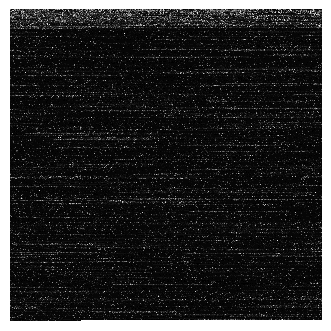

In [12]:
my_dpi = 96
fig = plt.figure(frameon=False, figsize=(dim / my_dpi, dim / my_dpi), dpi=my_dpi)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(qual_matrix, interpolation='none', cmap='Greys')
plt.savefig('quality.png', dpi=my_dpi)